# LEAP Motion Sensor AI Prediction

**Objective:** Classify hand gestures into pinch or fist category from features gathered from LEAP motion sensory using AI

[Go to data](leap_motion_data\all_data.csv)

## A Task 1

1. Data split 70%/30%, training and testing respectively
2. Model trained and tuned for best performance

### 1 Import

Import necessary libraries, load necessary datasets

In [14]:
# Libraries
from IPython.display import Image
%matplotlib inline
from sklearn import datasets
import numpy as np
import pandas as pd
import datascience as ds
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Data
full_data = pd.read_csv("leap_motion_data/all_data.csv")
X = np.array(full_data.iloc[:, 1:19])
for i in range(len(X)):
    for j in range(len(X[i])):
        X[i][j] = tuple(map(float, X[i][j].replace("(", "").replace(")", "").split(', ')))
        X[i][j] = tuple(X[i][j])
X_temp = []
for i in range(len(X)):
    temp_list = []
    for j in range(len(X[i])):
        for k in range(len(X[i][j])):
                temp_list.append(X[i][j][k])
    X_temp.append(temp_list)

X = np.array(X_temp)
y = np.array(full_data.iloc[:, 20])

### 2 Split data

Split data into training (70%) and testing (30%)

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle= True, random_state=1, stratify=y)

### 3 Standardize data

Standard deviations standardize data

In [16]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

### 4 Train model

Train model using various methods

| Method | Highest accuracy | Notes |
| - | - | - |
| SVM | 0.995 |  |
| SVM |  |  |
| SVM (kernel trick) |  |  |

#### SVM

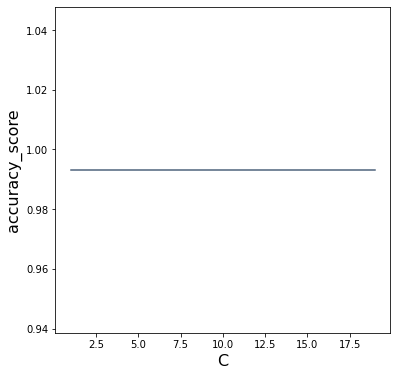

In [20]:
from sklearn.svm import SVC

iteration_range = range(1, 20)
accuracy_scores = []
for i in iteration_range:
    svm = SVC(kernel='linear', C=i, random_state=1)
    svm.fit(X_train_std, y_train)
    
    y_pred = svm.predict(X_test_std)
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    
ds.Table().with_columns(
    "C", iteration_range,
    "accuracy_score", accuracy_scores
).plot("C", "accuracy_score")
plt.show()

In [21]:
max_score = max(accuracy_scores)
print("Best C-value: " + str(iteration_range[accuracy_scores.index(max_score)]))
print("Best performance: " + str(max_score))

Best C-value: 1
Best performance: 0.993197278912


#### Perceptron

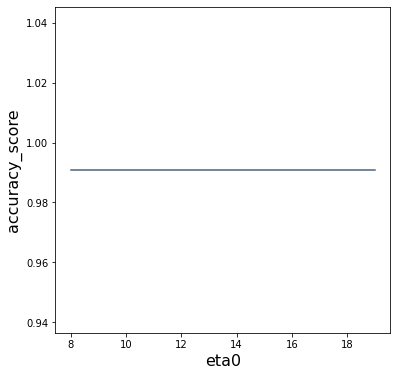

In [24]:
from sklearn.linear_model import Perceptron

iteration_range = range(8, 20)
accuracy_scores = []
for i in iteration_range:
    ppn = Perceptron(eta0=0.1, random_state=1)
    ppn.fit(X_train_std, y_train)

    y_pred = ppn.predict(X_test_std)
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    
ds.Table().with_columns(
    "eta0", iteration_range,
    "accuracy_score", accuracy_scores
).plot("eta0", "accuracy_score")
plt.show()

In [25]:
max_score = max(accuracy_scores)
print("Best eta0-value: " + str(iteration_range[accuracy_scores.index(max_score)]))
print("Best performance: " + str(max_score))

Best eta0-value: 8
Best performance: 0.990929705215


#### Logistic regression

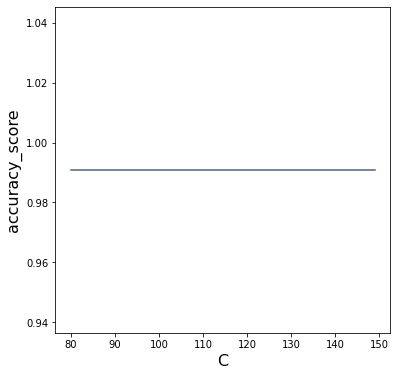

In [27]:
from sklearn.linear_model import LogisticRegression

iteration_range = range(80, 150)
accuracy_scores = []
for i in iteration_range:
    lr = LogisticRegression(C=i, solver='lbfgs', multi_class='ovr')
    lr.fit(X_train_std, y_train)
    
    lr.predict_proba(X_test_std)
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    
ds.Table().with_columns(
    "C", iteration_range,
    "accuracy_score", accuracy_scores
).plot("C", "accuracy_score")
plt.show()

In [28]:
max_score = max(accuracy_scores)
print("Best eta0-value: " + str(iteration_range[accuracy_scores.index(max_score)]))
print("Best performance: " + str(max_score))

Best eta0-value: 80
Best performance: 0.990929705215


### 5 Conclusion

SVM model performed with accuracy ranging from 99.3 to 99.5 percent for classifying LEAP motion data into pinch or fist categories. No significant improvements should be made. 

## B Task 2

1. Train models using 4 person / 1 person split, training and testing respectively
2. Repeat 5 times so each person is left out once
3. Compare with and explain difference in performance from A 

**Note:** Methods and hyperparameters used in Part B are based on those that performed best in Part A. Thus, SVM is used with a C hyperparameter of 1.

### 1 Load datasets

Load individual datasets, process data

In [45]:
datasets = ["christina_pinch", "enyu_fist", "louis_pinch", "peter_fist", "viraj_pinch"]

christina_pinch = pd.read_csv("leap_motion_data/christina_pinch.csv")
enyu_fist = pd.read_csv("leap_motion_data/enyu_fist.csv")
louis_pinch = pd.read_csv("leap_motion_data/louis_pinch.csv")
peter_fist = pd.read_csv("leap_motion_data/peter_fist.csv")
viraj_pinch = pd.read_csv("leap_motion_data/viraj_pinch.csv")

for dataset in datasets:
    cur_data = pd.read_csv("leap_motion_data/" + dataset + ".csv")
    X = np.array(cur_data.iloc[:, 1:19])
    for i in range(len(X)):
        for j in range(len(X[i])):
            X[i][j] = tuple(map(float, X[i][j].replace("(", "").replace(")", "").split(', ')))
            X[i][j] = tuple(X[i][j])
    X_temp = []
    for i in range(len(X)):
        temp_list = []
        for j in range(len(X[i])):
            for k in range(len(X[i][j])):
                    temp_list.append(X[i][j][k])
        X_temp.append(temp_list)
    
    locals()[dataset] = np.array(X_temp)
    
y = np.array(full_data.iloc[:, 20])

### 2 Train model iterations

Leaving one person as testing data, train the model 5 times with each individual

In [52]:
accuracy_scores = []
num_missed = []
for dataset in enumerate(datasets):
    training_datasets = list(datasets)
    testing_dataset = training_datasets.pop(dataset[0])
    svm = SVC(kernel='linear', C=i, random_state=1)
    svm.fit(X_train_std, y_train)
    y_pred = svm.predict(X_test_std)
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    num_missed.append((y_test != y_pred).sum())

ds.Table().with_columns(
    "testing_dataset", datasets,
    "accuracy_scores", accuracy_scores,
    "num_missed", num_missed
)

testing_dataset,accuracy_scores,num_missed
christina_pinch,0.993197,3
enyu_fist,0.993197,3
louis_pinch,0.993197,3
peter_fist,0.993197,3
viraj_pinch,0.993197,3


### 3 Conclusion

Performance from Part A is identical to performance in Part B. It is likely that no difference in prediction was observed because each dataset shared substantial similarities (and very few differences), in turn permitting the SVM model to cleanly draw render lines accurate to all the data sets.